###  GR MARKET

In [280]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [281]:
# filepath = 'C:\\Users\\1098071\\Documents\\RF\\'

In [282]:
df = pd.read_csv('MKTCAP.csv', encoding = 'cp932')
df.head()

,ddate,security_code,時価総額,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,...,営業資産,営業負債,有形固定,使用資産,ROIC,EY,MAGIC,ROIC2,EY2,MKTCAP
0,2000,2HRA,0.000,43.9143,3.2794,3.2482,34.0403,4.4293,1.0819,17.3527,...,11.8415,-9.3213,14.6434,17.1636,0.191067,inf,inf,0.133741,-0.792145,0.000
1,2000,A1OS,0.000,40.9510,0.2350,-0.7530,44.2850,1.7340,4.4300,19.6690,...,13.5050,-12.8700,12.8810,13.5160,0.017387,inf,inf,0.008256,0.183450,0.000
2,2000,AAA,0.000,10.9207,3.0013,2.0257,83.9710,0.0793,0.0000,0.0000,...,-0.0793,8.0549,78.5441,86.5197,0.034689,inf,inf,0.035742,0.064360,0.000
3,2000,AAD,91.902,34.2833,4.7588,2.6313,24.5565,17.7117,0.0000,21.2303,...,3.5186,-5.9551,1.2367,-1.1998,-3.966328,0.051781,-3.517914,0.280107,0.064143,91.902
4,2000,AAH,0.000,379.5033,31.3202,14.7845,264.9924,20.2257,0.9137,158.0551,...,136.9157,-43.4373,43.3560,136.8344,0.228891,inf,inf,0.149144,0.396824,0.000


In [284]:
# type(df['ddate'][0]) #  numpy.int64
# type(d[9])     # int

numpy.int64

In [318]:
# try to convert int time to datetime time 
# may not be used later 
import datetime

d = []
for i in range(len(df['ddate'])):
    d.append(datetime.datetime.strptime(np.array_str(df['ddate'].values[i]), '%Y').year)
    
print (d[9])

2000-01-01 00:00:00


#### data prep

In [171]:
# identify columns with all zero values 
zerocol = df.columns[(df == 0).all()]
type(zerocol)
zerocol

Index(['敷金及び保証金', '賞与引当金', '決算発表日', '剰余金の配当', '自己株式の消却', '新株の発行', '土地1',
       '経常利益', '長期社債(当期返済分)'],
      dtype='object')

In [172]:
# drop all columns with zero only values
df2 = df.drop(zerocol, axis = 1)
len(df2.columns)

67

In [109]:
# prepare 2014 MKTCAP as y

df2014 = df2[df2['ddate'] == 2014][['security_code', 'MKTCAP']]
df2014.head()
# df2014.describe()
len(df2014['security_code'])

531

In [336]:
df2014['MKTCAP'].describe()

count       510.000000
mean       1648.718397
std       10243.368384
min           0.000000
25%           0.000000
50%          12.149350
75%         126.852350
max      108753.579700
Name: MKTCAP, dtype: float64

In [337]:
# max is at 108753.579700, while the 75% quantile is just 126
# removing the extremes later in MKTCAP for better visulalizatio and 
# estimation accuracy 

print (df2014['MKTCAP'].quantile(0.9))
print (df2014['MKTCAP'].max())

print (len(df2014[df2014['MKTCAP'] < 1100]))

1086.352133958202
108753.5797
459


In [335]:
# prepare all data in 2013 as features for x

collist = list(df2.columns[1:61])
df2013 = df2[df2['ddate'] == 2013][collist]

# removing '時価総額', which is Market Capitalization
# MKTCAP is the adjusted market capitaliztion with the amount of self owned stocks removed 
del df2013['時価総額']
df2013.head()
# df2013.describe()
# len(df2013['security_code'])

,security_code,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,総長期投資,有形固定資産,...,株主資本,販管費,売上総利益率,営業利益率,株主還元,純現金資産,営業資産,営業負債,有形固定,使用資産
5732,1COV,11357.0000,391.0000,180.0000,10133.0000,37.0000,546.000,3829.0000,1021.00,4442.0000,...,2779.0000,-1576.0000,0.173197,0.034428,0.0,-2947.0000,3246.0000,-1794.0000,4442.0000,5894.0000
5733,1PL,167.1170,12.3130,5.3910,221.7340,15.3940,0.000,142.7590,0.00,78.8160,...,151.3110,-48.5030,0.363913,0.073679,0.0,-44.2760,127.3650,-10.7530,78.8160,195.4280
5734,2GB,126.1297,2.7796,0.8943,88.6293,10.4454,0.030,66.7018,0.01,15.8228,...,47.1524,2.7796,0.000000,0.022038,0.0,3.2530,56.2264,-18.8558,15.8228,53.1934
5735,2HRA,1214.3960,-4.4050,-14.0290,594.6560,109.6240,1.797,341.4460,4.10,197.9060,...,189.1620,-4.4050,0.000000,-0.003627,0.0,-76.1810,230.0250,-144.8070,197.9060,283.1240
5736,3GOK,0.3240,-0.1807,-13.9277,4.6553,0.0235,0.000,0.6903,0.00,0.0000,...,1.2313,-0.1807,0.000000,-0.557716,0.0,-0.9965,0.6668,-2.2038,0.0000,-1.5370


In [357]:
# only keeping companies that exist in both 2013 and 2014 
# extreme data points removed data set 
# will only work on data2 later 

data = pd.merge(df2013, df2014, how='inner', on=['security_code']).dropna()
data2 = data[data['MKTCAP'] < 1100]

data2.head()
# data.describe()
# len(data2['security_code'])   # 441

,security_code,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,総長期投資,有形固定資産,...,販管費,売上総利益率,営業利益率,株主還元,純現金資産,営業資産,営業負債,有形固定,使用資産,MKTCAP
1,1PL,167.1170,12.3130,5.3910,221.7340,15.3940,0.0000,142.7590,0.0000,78.8160,...,-48.5030,0.363913,0.073679,0.0,-44.2760,127.3650,-10.7530,78.8160,195.4280,8.265000
2,2GB,126.1297,2.7796,0.8943,88.6293,10.4454,0.0300,66.7018,0.0100,15.8228,...,2.7796,0.000000,0.022038,0.0,3.2530,56.2264,-18.8558,15.8228,53.1934,99.276300
3,2HRA,1214.3960,-4.4050,-14.0290,594.6560,109.6240,1.7970,341.4460,4.1000,197.9060,...,-4.4050,0.000000,-0.003627,0.0,-76.1810,230.0250,-144.8070,197.9060,283.1240,0.000000
4,3GOK,0.3240,-0.1807,-13.9277,4.6553,0.0235,0.0000,0.6903,0.0000,0.0000,...,-0.1807,0.000000,-0.557716,0.0,-0.9965,0.6668,-2.2038,0.0000,-1.5370,0.074600
5,4DS,60.8263,1.0161,0.7158,78.0599,3.5673,1.4441,32.0063,2.7374,39.9750,...,1.0161,0.000000,0.016705,0.0,-0.9106,26.9949,-7.8704,42.7124,61.8369,55.100962


In [349]:
# all MKTCAP in the dataset are non negative 
sum(data2['MKTCAP'] < 0)

0

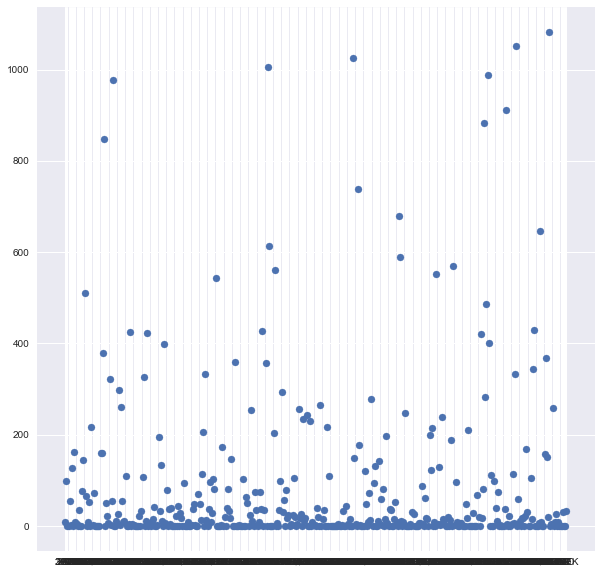

In [344]:
# scatter plot all available data; MKTCAP from 2014 and featueres from 2013 

fig = plt.figure(figsize = (10,10))

num =  len(data2['security_code']) 
x = np.arange(num)
y = data2['MKTCAP']
my_xticks = list(data2['security_code'].values)
plt.xticks(x, my_xticks)
plt.scatter(x, y)
plt.show()

In [345]:
# np.array_str(df2['security_code'].values)

In [165]:
# checking the years with the most data available 
# df2.groupby('ddate').count()

### feature selection - TSNE, PCA(feature selection or generation)

### estimate absolute MKTCAP - RF

In [157]:
# use 2013 data to predict 2014 MKTCAP

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [415]:
# features from data in 2013
featurelist = data2.columns[1:59]
print (len(featurelist))
data2[featurelist].head()

58


,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,総長期投資,有形固定資産,短期借入金,...,株主資本,販管費,売上総利益率,営業利益率,株主還元,純現金資産,営業資産,営業負債,有形固定,使用資産
1,167.1170,12.3130,5.3910,221.7340,15.3940,0.0000,142.7590,0.0000,78.8160,57.500,...,151.3110,-48.5030,0.363913,0.073679,0.0,-44.2760,127.3650,-10.7530,78.8160,195.4280
2,126.1297,2.7796,0.8943,88.6293,10.4454,0.0300,66.7018,0.0100,15.8228,0.000,...,47.1524,2.7796,0.000000,0.022038,0.0,3.2530,56.2264,-18.8558,15.8228,53.1934
3,1214.3960,-4.4050,-14.0290,594.6560,109.6240,1.7970,341.4460,4.1000,197.9060,17.940,...,189.1620,-4.4050,0.000000,-0.003627,0.0,-76.1810,230.0250,-144.8070,197.9060,283.1240
4,0.3240,-0.1807,-13.9277,4.6553,0.0235,0.0000,0.6903,0.0000,0.0000,0.000,...,1.2313,-0.1807,0.000000,-0.557716,0.0,-0.9965,0.6668,-2.2038,0.0000,-1.5370
5,60.8263,1.0161,0.7158,78.0599,3.5673,1.4441,32.0063,2.7374,39.9750,1.496,...,65.9583,1.0161,0.000000,0.016705,0.0,-0.9106,26.9949,-7.8704,42.7124,61.8369


In [381]:
# training testing data split 4:1, set random_state to keep datapoints the same if split is run mora than once 

x_train, x_test, y_train, y_test =  train_test_split(data2[featurelist], data2['MKTCAP'], test_size = 0.2, random_state = 0)

x_train.shape

(352, 58)

In [443]:
# 352 pairs of data in training set
regr = RandomForestRegressor(random_state=0)
regr.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [444]:
# gives coefficient of determination R^2 of the prediction

regr.score(x_test, y_test)

0.18073794883679617

In [389]:
# default number of trees in a RF is 10 
# regr.estimators_

In [445]:
# feature importance exploration  
# number of features put into the model is 58

importances = regr.feature_importances_
# return indices of the most important featuer last, use [::-1] to reverse order
indices = np.argsort(importances)[::-1]

# standard devivation along columns
std = np.std([tree.feature_importances_ for tree in regr.estimators_], axis=0)

In [446]:
print("Feature ranking:")

for f in range(x_train.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    print ('{}. feature {}, which is {}, has an importance of {}'.format(f + 1, indices[f], featurelist[indices[f]], importances[indices[f]]))


Feature ranking:
1. feature 49, which is 販管費, has an importance of 0.10367056550112634
2. feature 1, which is 営業利益, has an importance of 0.0981631047947192
3. feature 34, which is 自己株金額, has an importance of 0.09625541083417424
4. feature 24, which is 貸倒引当金, has an importance of 0.0837280961527301
5. feature 18, which is 売上総利益, has an importance of 0.05760788509965544
6. feature 33, which is 少数持分, has an importance of 0.04726337486264378
7. feature 48, which is 株主資本, has an importance of 0.03455573881056311
8. feature 53, which is 純現金資産, has an importance of 0.031758480405250006
9. feature 0, which is 売上, has an importance of 0.02979914823262479
10. feature 55, which is 営業負債, has an importance of 0.02667715505786706
11. feature 51, which is 営業利益率, has an importance of 0.025688956277045778
12. feature 42, which is 無形資産その他, has an importance of 0.02402420275660263
13. feature 36, which is 税引前利益, has an importance of 0.020886797602678375
14. feature 22, which is 買掛金, has an importance of 

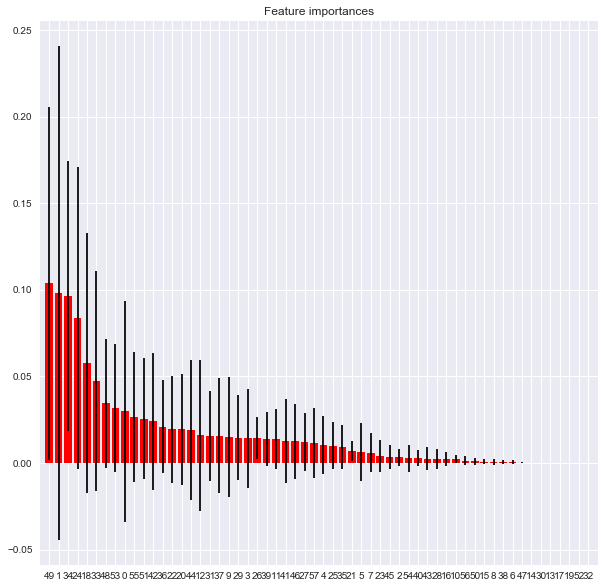

In [447]:
# feature importaance plot 

fig = plt.figure(figsize = (10, 10))

plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [433]:
# prediction on testing set 
print (regr.predict(x_test))

[  50.37090129   50.37090129   42.48177316   42.48177316   42.48177316
  103.8663193    42.48177316   42.48177316   42.48177316   50.63651844
   42.48177316   42.48177316  104.13193646   42.48177316   42.48177316
   42.48177316   50.37090129   42.48177316   42.48177316   42.48177316
   50.63651844   42.48177316  199.17636156   42.48177316   42.48177316
   95.97719118   42.48177316   42.48177316   42.48177316   42.48177316
  194.58294968   42.48177316  204.29317762   42.48177316   57.83167178
   42.48177316   58.52564656  176.57361584   42.48177316  150.34073827
  210.621902     42.48177316  142.45161015   42.48177316   42.48177316
   42.48177316   42.48177316   87.48477621  199.17636156   42.48177316
  252.09142346   95.97719118   42.48177316  112.02106458   42.48177316
   42.48177316   42.48177316   42.48177316  150.34073827   42.48177316
   42.48177316   42.48177316   49.6769265   182.9647628   150.5393463
   42.48177316   42.48177316   42.48177316   50.37090129   42.48177316
   42.4

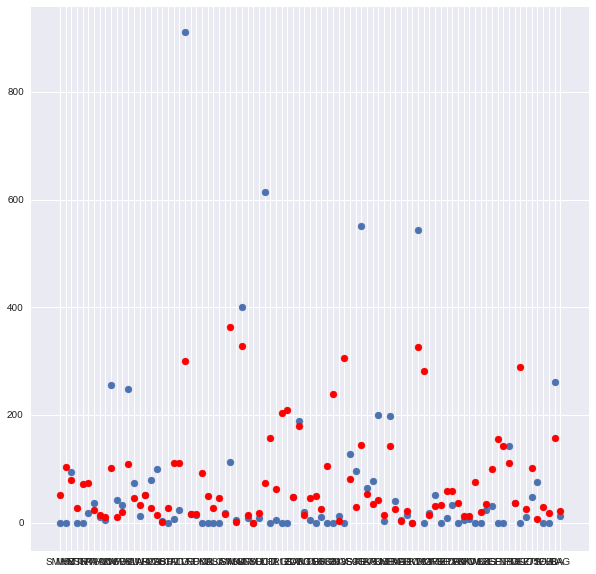

In [448]:
fig = plt.figure(figsize = (10,10))
ax = plt.subplot(1, 1, 1)

num_predict = len(x_test)
x = np.arange(num_predict)
y = data2['MKTCAP'].loc[y_test.index].values
my_xticks = list(data2['security_code'].loc[x_test.index].values)
plt.xticks(x, my_xticks)   # blue dots are actual values 
plt.scatter(x, y)

# ax. scatter(x_test, regr.predict(x_test))

y1 = regr.predict(x_test)
plt.xticks(x, my_xticks)

ax.scatter(x, y1, color = 'red')  # red dots are predicted MKTCAP

plt.show()

In [449]:
y_test.describe()

count     89.000000
mean      69.342641
std      149.937766
min        0.000000
25%        0.000000
50%       11.520000
75%       52.200000
max      911.626900
Name: MKTCAP, dtype: float64

In [450]:
pd.DataFrame(regr.predict(x_test)).describe()

,0
count,89.000000
mean,77.554644
std,86.972407
min,0.000000
25%,19.731871
50%,44.968030
75%,103.646413
max,364.247101


In [437]:
# type(data2['security_code'].loc[x_test.index].values)

#### CV

In [451]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

 Valid scoring options are ['accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc']


In [460]:
regr = RandomForestRegressor(random_state=0)
scores = cross_val_score(regr, data2[featurelist], data2['MKTCAP'], cv = 5, scoring = 'r2')

# the neagtive coefficients of correlation indicates that the model couldn't even outperform predicting the mean all the time
print (scores)
print (sum(scores)/5)

[ 0.14583491 -1.2490622   0.25096111 -0.4299487   0.21851164]
-0.21274064728


#### parameter tuning

In [453]:
len(data2['MKTCAP'])

441

In [455]:
regr.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [493]:
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import load_digits

x, y = data2[featurelist], data2['MKTCAP']
model = RandomForestRegressor(random_state = 0)
param_grid = { "n_estimators"      : [400, 300],
           "criterion"         : ["gini", "entropy"],
           "max_features"      : [8, 9],
           "max_depth"         : [10, 15],
           "min_samples_split" : [2, 4] ,
           "bootstrap": [True, False]}
grid_search = GridSearchCV(model, param_grid, n_jobs = -1, cv = 5)
grid_search.fit(x, y)
print (grid_search.best_params_)

{'bootstrap': True, 'max_depth': 10, 'max_features': 8, 'min_samples_split': 4, 'n_estimators': 400}


In [471]:
model_tuned = RandomForestRegressor(**grid_search.best_params_, random_state = 0)

In [ ]:
model_tuned.get_params()

In [472]:
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size = 0.2, random_state = 0)
model_tuned.fit(x_train, y_train)

# model.set_params(grid_search.best_params_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=8, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [474]:
# performance on testing data 

model_tuned.score(x_test, y_test)

0.177854367387413

In [488]:
# performance eval using CV

scores = cross_val_score(model_tuned, x, y, cv = 5, scoring = 'r2')

# the neagtive coefficients of correlation indicates that the model couldn't even outperform predicting the mean all the time
print (scores)
print (sum(scores)/5)


[ 0.21023122 -0.93910122  0.26606271 -0.1831314   0.01421484]
-0.126344769802


In [491]:
# the default RF model from before 
regr = RandomForestRegressor(random_state=0)
regr.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

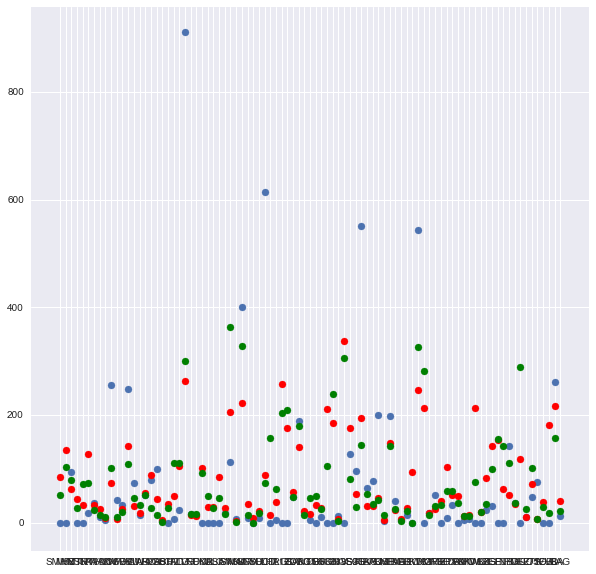

In [492]:
fig = plt.figure(figsize = (10,10))
ax = plt.subplot(1, 1, 1)

num_predict = len(x_test)
x = np.arange(num_predict)
y = data2['MKTCAP'].loc[y_test.index].values
my_xticks = list(data2['security_code'].loc[x_test.index].values)
plt.xticks(x, my_xticks)   # blue dots are actual values 
plt.scatter(x, y)

# ax. scatter(x_test, regr.predict(x_test))

y2 = model_tuned.predict(x_test)
plt.xticks(x, my_xticks)

ax.scatter(x, y2, color = 'red')  # red dots are predicted MKTCAP from tuned model


y1 = regr.predict(x_test)
plt.xticks(x, my_xticks)

ax.scatter(x, y1, color = 'green')    # red dots are predicted MKTCAP from default model

plt.show()

### predict trends (increase or decrease) in MKTCAP
#### NB
#### time series

##### need labeled data here 